# **Import Libraries and modules**

In [2]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


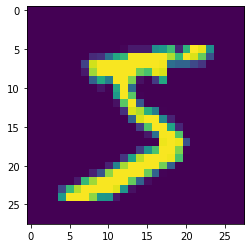

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [115]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26*26*32
model.add(Convolution2D(32, 3, 3, activation='relu')) #24*24*64
model.add(Convolution2D(32, 3, 3, activation='relu')) #22*22*128
model.add(Convolution2D(32, 3, 3, activation='relu')) #20*20*256
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Convolution2D(10, 1, activation='relu')) #5*5*10
model.add(Convolution2D(10, 10))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  


In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 10)         

In [14]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model = Sequential()

model.add(Convolution2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Convolution2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))


model.add(Convolution2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Convolution2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#model.add(Dropout(0.25))
model.add(Convolution2D(10, 1, activation='relu')) #5*5*10
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

#model.add(Flatten())
#model.add(Dense(256, activation = "relu"))
#model.add(Dropout(0.5))
#model.add(Dense(10, activation = "softmax"))

In [15]:
model.fit(X_train, Y_train, batch_size=256, nb_epoch=16, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/16





60000/60000 [==============================] - 11s 176us/step - loss: 0.3488 - acc: 0.8959
Epoch 2/16
60000/60000 [==============================] - 3s 44us/step - loss: 0.0782 - acc: 0.9767
Epoch 3/16
60000/60000 [==============================] - 3s 44us/step - loss: 0.0570 - acc: 0.9824
Epoch 4/16
60000/60000 [==============================] - 3s 44us/step - loss: 0.0436 - acc: 0.9863
Epoch 5/16
60000/60000 [==============================] - 3s 44us/step - loss: 0.0383 - acc: 0.9880
Epoch 6/16
60000/60000 [==============================] - 3s 44us/step - loss: 0.0318 - acc: 0.9900
Epoch 7/16
60000/60000 [==============================] - 3s 44us/step - loss: 0.0262 - acc: 0.9918
Epoch 8/16
60000/60000 [==============================] - 3s 44us/step - loss: 0.0232 - acc: 0.9931
Epoch 9/16
60000/60000 [==============================] - 3s 44us/step - loss: 0.0206 - acc: 0.9

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [17]:
print(score)

[0.035087676023876656, 0.991]


In [0]:
y_pred = model.predict(X_test)

In [20]:
print(y_pred[:9])
print(y_test[:9])

[[4.45416888e-20 9.18866288e-14 2.41144843e-12 1.64274327e-09
  2.36280199e-22 1.73170682e-13 1.11378593e-23 1.00000000e+00
  1.32727745e-13 2.72659673e-10]
 [3.27814078e-12 3.23606528e-08 1.00000000e+00 8.49635710e-14
  4.96647181e-17 1.32555104e-18 1.46604471e-08 2.64419255e-16
  9.00145236e-11 7.55358842e-14]
 [1.08666376e-09 9.99996543e-01 7.27666061e-09 4.41538761e-09
  9.80518053e-07 5.90645300e-07 4.04021563e-07 5.10054221e-08
  1.38362680e-06 9.44784355e-12]
 [9.98794556e-01 2.99522927e-18 3.92544530e-09 3.97704574e-13
  1.26247550e-13 2.13347756e-10 1.20540650e-03 9.07033034e-15
  1.59024669e-08 4.41628378e-09]
 [1.04561997e-12 1.50444254e-10 1.16935919e-10 6.03125406e-14
  9.99839067e-01 7.20746683e-12 1.85039450e-09 2.31282202e-10
  8.99739450e-11 1.60866373e-04]
 [4.70486539e-10 9.99999166e-01 2.35155007e-08 1.37671142e-11
  6.27275313e-07 1.40222278e-09 1.37633283e-08 1.02225428e-07
  7.50198765e-08 5.13943471e-11]
 [3.64299260e-20 8.03857103e-14 2.08243067e-14 1.43809833e

In [21]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'activation_1': <keras.layers.core.Activation at 0x7f81fcab1b00>,
 'conv2d_10': <keras.layers.convolutional.Conv2D at 0x7f81fcb0da58>,
 'conv2d_11': <keras.layers.convolutional.Conv2D at 0x7f81fcb13c50>,
 'conv2d_12': <keras.layers.convolutional.Conv2D at 0x7f81fcaa4898>,
 'conv2d_7': <keras.layers.convolutional.Conv2D at 0x7f81fcb01208>,
 'conv2d_8': <keras.layers.convolutional.Conv2D at 0x7f81fcb01278>,
 'conv2d_9': <keras.layers.convolutional.Conv2D at 0x7f81fcb01438>,
 'flatten_1': <keras.layers.core.Flatten at 0x7f81fcaa91d0>,
 'max_pooling2d_3': <keras.layers.pooling.MaxPooling2D at 0x7f81fcb00f28>,
 'max_pooling2d_4': <keras.layers.pooling.MaxPooling2D at 0x7f81fcb1e048>}

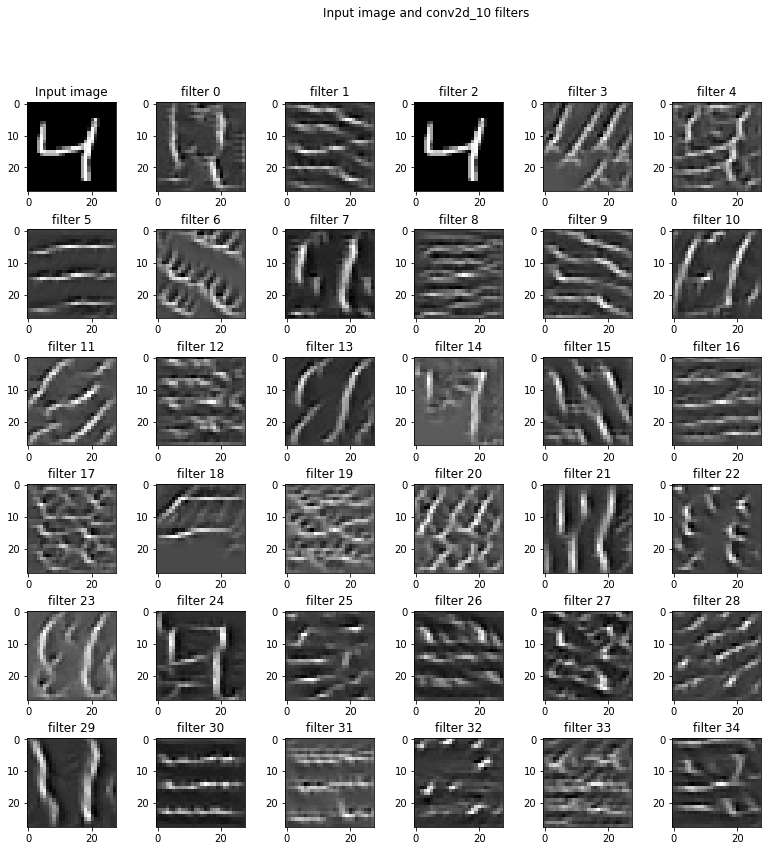

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_10'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()